In [1]:
#Descriptive Statistics:-
#gives the summary of the data frameby describing its mean,variance,standard deviation

In [2]:
#Distributions
#probability
#binomial:random.binomial(n=10,p=0.5,size=1000),n trails,p probability of success
#poisson:used for expected events in fixed time interval,random.poisson(lam=3,size=1000)
#normal(gaussian):bell shaped curverandom.normal(loc=0,scale=1,size=1000)
#loc=mean,scale=std deviation
#exponential:used for time -to-event predictions

In [3]:
#Hypothesis testing(conclusions about population parameters based on sample data )
#null hypothesis(no difference)
#eg:there is no difference in test scores btw 2 groups
#alternative hypothesis(opp of null hypo)
#eg:there is a difference btw 2 test groups
#p-value:calculated val to prove null hypo is true,range=0-1
#alpha:predecided to oppose the null hypo,usually=0.05/0.01

In [4]:
#statistical modeling:
#linear,logistic,time series models,ANOVA

In [5]:
#Data Visualization:
#graphical representation for better insights 
#bar charts,line charts,pie charts,scatter plots,boxplots,heatmaps

In [6]:
#Correlation:quantifies the relation btw 2 var(-1 to 1),
#to check if the two are related or not
#1-positive
#-1:negative
#0-no corr
#and Regression:
#models relation btw dep var and indp var
#simple,multiple
#predicts dep var with indp var

In [ ]:
#Experimental Design:
#conducting exp to indentify casual relations for predict the model
#eg:feature selection

In [7]:
import numpy as np
from sklearn.datasets import load_iris

In [8]:
iris=load_iris()
data=iris.data

In [12]:
mean=data.mean()
median=np.median(data,axis=0)
std_dev=np.std(data,axis=0)
variance=np.var(data,axis=0)

In [13]:
print(mean,median,std_dev,variance)

3.4644999999999997 [5.8  3.   4.35 1.3 ] [0.82530129 0.43441097 1.75940407 0.75969263] [0.68112222 0.18871289 3.09550267 0.57713289]


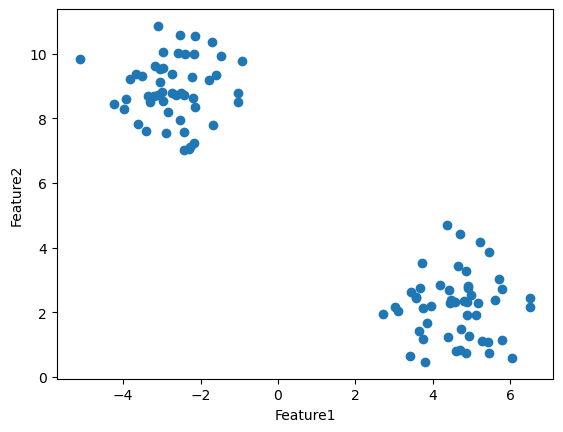

In [16]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X,_=make_blobs(n_samples=100,centers=2,n_features=2,random_state=42)

plt.scatter(X[:,0],X[:,1])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

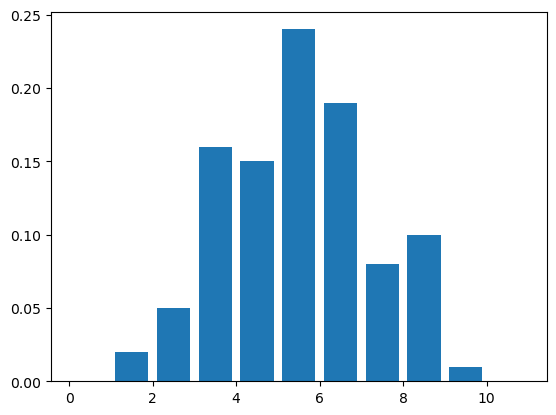

In [17]:
n=10
p=0.5
bs=np.random.binomial(n,p,size=100)
plt.hist(bs,bins=np.arange(n+2),rwidth=0.8,density=True)
plt.show()

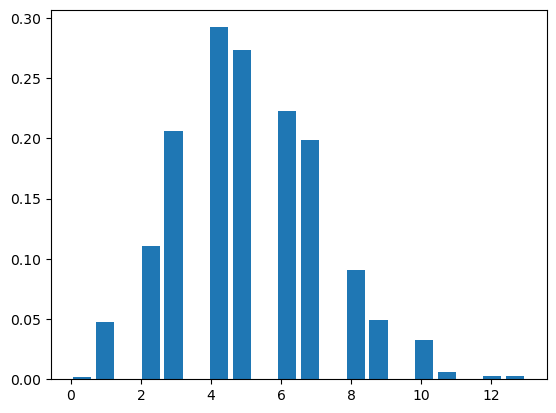

In [18]:
lambda_v=5
poisson_s=np.random.poisson(lambda_v,size=1000)
plt.hist(poisson_s,bins=20,rwidth=0.8,density=True)
plt.show()

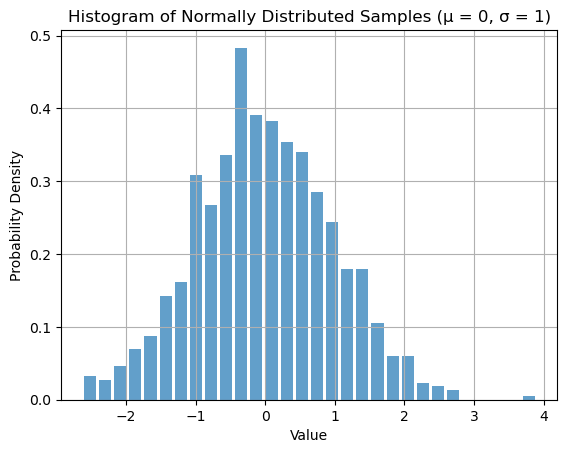

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0       # Mean
sigma = 1    # Standard deviation

# Generate samples from a normal distribution
n_samples = np.random.normal(mu, sigma, size=1000)

# Plot the histogram
plt.hist(n_samples, bins=30, rwidth=0.8, density=True, alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram of Normally Distributed Samples (μ = 0, σ = 1)')
plt.grid()
plt.show()


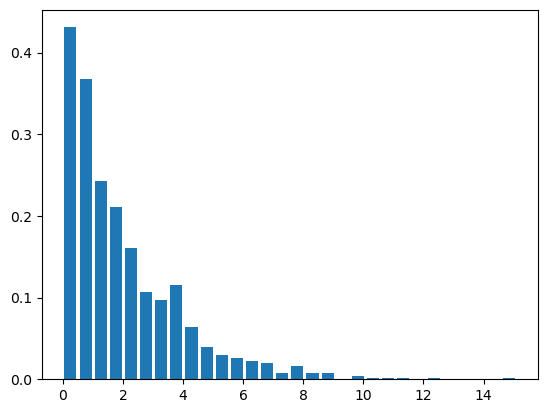

In [21]:
lambda_v=0.5
exp_s=np.random.exponential(scale=1/lambda_v,size=1000)
plt.hist(exp_s,bins=30,rwidth=0.8,density=True)
plt.show()

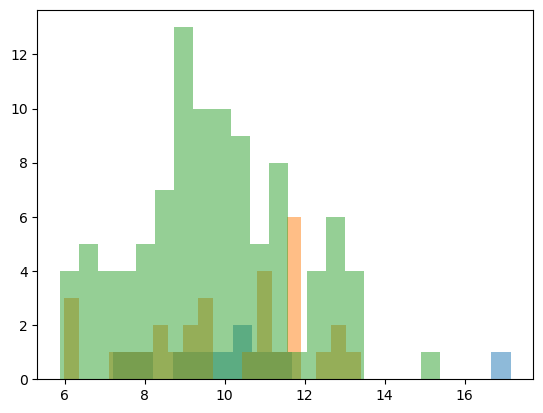

In [22]:
mu=10
sigma=2
pop=np.random.normal(mu,sigma,size=10000)
sample_s=[10,30,100]
samp_d=[]
for sample_size in sample_s:
    sample=np.random.choice(pop,size=sample_size,replace=False)
    samp_d.append(sample)
    
for i ,samp in  enumerate(samp_d):
    plt.hist(samp,bins=20,alpha=0.5,label=f'Sample Size{sample_s[i]}')
plt.show()    
    

In [24]:
from scipy.stats import ttest_ind
iris=load_iris()
data=iris.data
target=iris.target
group1=data[target==0]
group2=data[target==1]
t_stat,pvalue=ttest_ind(group1[:,0],group2[:,0])
print(t_stat,pvalue)

-10.52098626754911 8.985235037487079e-18


In [26]:
from scipy.stats import ttest_ind   #T-test of two samples of irisdataset
iris=load_iris()
data=iris.data
target=iris.target
group1=data[target==0]
group2=data[target==1]
t_stat,pvalue=ttest_ind(group1[:,0],group2[:,0])
print(t_stat,pvalue)
if pvalue<0.05:
    print('Difference is significant')
else:
    print('Not significant')

-10.52098626754911 8.985235037487079e-18
Difference is significant


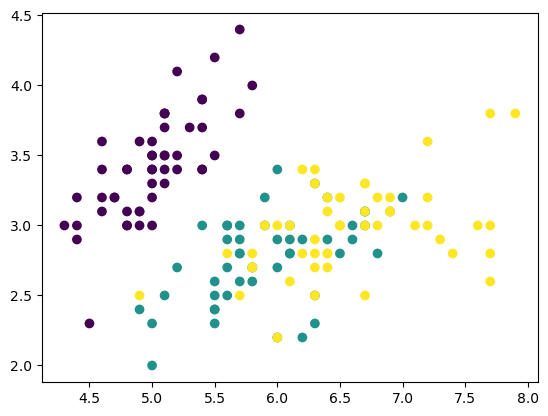

In [27]:
plt.scatter(data[:,0],data[:,1],c=target)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
X=data[:, :2]
y=target
reg_model=LinearRegression()
reg_model.fit(X,y)
print(reg_model.intercept_)
print(reg_model.coef_)

-1.3433397922944712
[ 0.73474169 -0.63781099]


In [30]:
import pandas as pd
import seaborn as sns

In [31]:
iris=load_iris()
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)
data['target']=iris.target

In [32]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


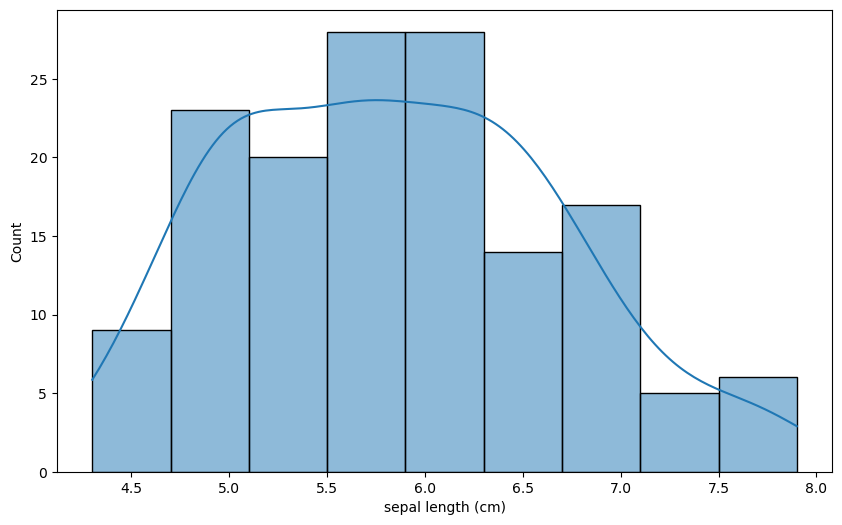

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data['sepal length (cm)'],kde=True)
plt.show()

In [36]:
group1=data[data['target']==0]
group2=data[data['target']==1]

In [37]:
ts,pv=ttest_ind(group1['sepal length (cm)'],group2['sepal length (cm)'])
print(ts,pv)

-10.52098626754911 8.985235037487079e-18


In [38]:
corr=data['sepal length (cm)'].corr(data['sepal width (cm)'])

In [39]:
print(corr)

-0.11756978413300208


In [40]:
X=data['sepal length (cm)'].values.reshape(-1,1)
y=data['sepal width (cm)'].values


In [41]:
reg_model=LinearRegression()
reg_model.fit(X,y)

LinearRegression()

In [43]:
print('Intercept=',reg_model.intercept_)

Intercept= 3.418946836103816


In [44]:
print('Slope=',reg_model.coef_[0])

Slope= -0.061884797964144166


<function matplotlib.pyplot.show(close=None, block=None)>

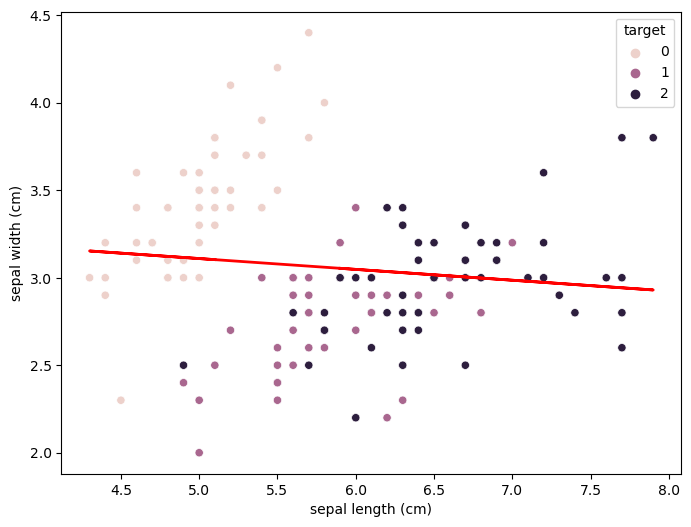

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='sepal length (cm)',y='sepal width (cm)',hue='target')
plt.plot(X,reg_model.predict(X),color='red',linewidth=2)
plt.show